In [232]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from matplotlib import rcParams

sns.set_style('white')
sns.set_context('paper')

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['UGent Panno Text', 'Tahoma']

UGENT_BLUE = "#1E64C8"
UGENT_BLUE_FILL = "#e6effb"
UGENT_YELLOW = "#FFD200"
UGENT_EA = "#6F71B9"
UGENT_GREEN = "#71A860"
GREY = '#666666'

In [242]:
def _save_for_report(fig, name, do_close=True):
    fig.tight_layout(pad=0)
    # plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    plt.savefig('../img/{}.png'.format(name), pad_inches=0)
    plt.savefig('../img/{}.pgf'.format(name), pad_inches=0)

    if do_close:
        plt.close()

    print("Wrote ./img/{}.{{png,pgf}}.".format(name))
    print("If your plot includes images, don't forget to update its path in the .pgf file.")
    print(name)

In [244]:
df = pd.read_csv('../data/survey-results.csv', index_col=0)
print(df.shape)
df.head()

(34, 38)


,submitdate,lastpage,startlanguage,startdate,datestamp,ATTGENDER,Q1SCALE[Q1SQ001],Q1SCALE[Q1SQ002],Q1SCALE[Q1SQ003],Q1SCALE[Q1SQ004],...,Q5SCALE[Q1SQ003],Q5SCALE[Q1SQ004],Q5PREF,Q6SCALE[Q1SQ001],Q6SCALE[Q1SQ002],Q6SCALE[Q1SQ003],Q6SCALE[Q1SQ004],Q6PREF,ATTCSHOULDER,interviewtime
id,,,,,,,,,,,,,,,,,,,,,
3,2018-07-25 20:13:31,8,en,2018-07-25 20:02:41,2018-07-25 20:13:31,Orange penguin,"1 (stiff, robot-like)",3,2,4,...,4,3,First robot (left),5 (human-like),5 (human-like),3,3,Third robot,Blue,654.07
4,2018-07-25 20:27:53,8,en,2018-07-25 20:19:05,2018-07-25 20:27:53,orange penguin,2,3,"1 (stiff, robot-like)",4,...,4,2,Third robot,3,2,4,"1 (stiff, robot-like)",Third robot,Blue,532.05
7,2018-07-26 05:21:27,8,en,2018-07-26 05:05:39,2018-07-26 05:21:27,Orange penguin,"1 (stiff, robot-like)",3,2,4,...,3,4,Fourth robot,4,"1 (stiff, robot-like)",3,2,First robot (left),Blue,951.81
8,2018-07-26 06:47:26,8,en,2018-07-26 06:42:02,2018-07-26 06:47:26,orange penguin,"1 (stiff, robot-like)","1 (stiff, robot-like)","1 (stiff, robot-like)","1 (stiff, robot-like)",...,"1 (stiff, robot-like)","1 (stiff, robot-like)",First robot (left),"1 (stiff, robot-like)","1 (stiff, robot-like)",2,"1 (stiff, robot-like)",Fourth robot,Blue,326.62
9,2018-07-26 11:15:38,8,en,2018-07-26 10:56:39,2018-07-26 11:15:38,Orange penguin,2,4,"1 (stiff, robot-like)",3,...,4,"1 (stiff, robot-like)",Third robot,4,2,4,"1 (stiff, robot-like)",Third robot,Blue,1142.37


In [132]:
case_names = ['Ground Truth', 'Classification', 'Sequence', 'Native']
case_order = np.array([
    [1, 2, 3, 4],
    [3, 2, 1, 4],
    [2, 1, 4, 3],
    [4, 3, 2, 1],
    [1, 2, 4, 3],
    [2, 1, 4, 3]
])
scale_names = ['1 (stiff, robot-like)', '2', '3', '4', '5 (human-like)']
pref_names = ['First robot (left)', 'Second robot', 'Third robot', 'Fourth robot']

def q_scale_name(nq, ns):
    return 'Q{}SCALE[Q1SQ{:03d}]'.format(nq+1, ns+1)
def q_pref_name(nq):
    return 'Q{}PREF'.format(nq+1)

In [245]:
# Filter those with correct attention checks
df = df[(df['ATTGENDER'].str.lower() == 'orange penguin') & (df['ATTCSHOULDER'] == 'Blue')]
print(df.shape)

(18, 38)


In [134]:
# Remove unwanted columns
df = df[
    [q_scale_name(nq, ns) for nq, ns in itertools.product(range(6), range(4))]
    + [q_pref_name(nq) for nq in range(6)]
]

In [135]:
# Rename/reorder scales
scale_name_map = { q_scale_name(nq, ns):('robot_{}'.format(case_order[nq, ns])) for nq, ns in itertools.product(range(6), range(4)) }
df = df.rename(index=str, columns=scale_name_map)

df = df.replace(scale_names, range(len(scale_names)))

In [136]:
df.head()

,robot_1,robot_2,robot_3,robot_4,robot_3,robot_2,robot_1,robot_4,robot_2,robot_1,...,robot_2,robot_1,robot_4,robot_3,Q1PREF,Q2PREF,Q3PREF,Q4PREF,Q5PREF,Q6PREF
id,,,,,,,,,,,,,,,,,,,,,
3,0,2,1,3,3,1,2,3,3,0,...,4,4,2,2,Second robot,Fourth robot,Second robot,First robot (left),First robot (left),Third robot
4,1,2,0,3,0,3,1,2,2,1,...,2,1,3,0,Fourth robot,Second robot,Third robot,First robot (left),Third robot,Third robot
7,0,2,1,3,0,1,2,3,2,0,...,3,0,2,1,Fourth robot,Third robot,First robot (left),Second robot,Fourth robot,First robot (left)
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,Fourth robot,Third robot,Second robot,Fourth robot,First robot (left),Fourth robot
9,1,3,0,2,0,1,3,3,1,3,...,3,1,3,0,Second robot,Fourth robot,Second robot,First robot (left),Third robot,Third robot


In [137]:
# Rename/reorder preferences
pref_map = ({
    q_pref_name(nq): {pref_names[case_order[nq, ns]-1]:ns for ns in range(4)} for nq in range(6)
})
pref_name_map = { q_pref_name(nq):'pref' for nq in range(6) }
df = df.replace(pref_map)

scale_map = ({
    
})
df = df.rename(index=str, columns=pref_name_map)

In [138]:
dm = df.melt()
dm.head()

,variable,value
0,robot_1,0
1,robot_1,1
2,robot_1,0
3,robot_1,0
4,robot_1,1


In [139]:
long_df = dm.pivot(columns='variable', values='value')

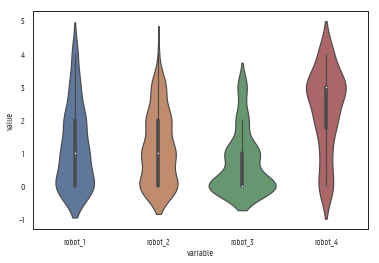

In [180]:
sns.set_palette("deep", desat=.6)


sns.violinplot(
    x='variable', y='value', 
    data=dm, 
    order=['robot_1', 'robot_2', 'robot_3', 'robot_4'],
    #color=UGENT_BLUE_FILL,
    saturation=1)

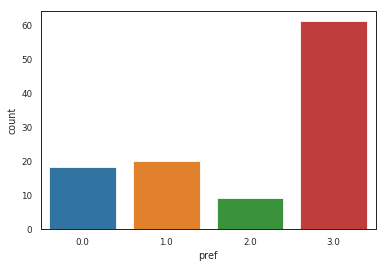

In [162]:
sns.countplot(x='pref', data=long_df)

In [243]:
robot_ratings = [np.array(
    long_df['robot_{}'.format(i)].dropna()
) for i in range(1, 5)]

flierprops = dict(
    markeredgecolor=GREY
)

fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
bplot = plt.boxplot(robot_ratings, 
                    patch_artist=True,
                    flierprops=flierprops)

ax.spines['left'].set_position(('outward', 12))
ax.spines['left'].set_bounds(0, 4)
ax.spines['left'].set_color(GREY)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
plt.xticks([1, 2, 3, 4], case_names)
ax.tick_params(axis='y', colors=GREY)

# fill with colors
for patch in bplot['boxes']:
    patch.set_facecolor(UGENT_BLUE_FILL)
    patch.set_edgecolor(UGENT_BLUE)

for line in bplot['whiskers'] + bplot['caps']:
    line.set_color(UGENT_BLUE)
    
for median in bplot['medians']:
    median.set_color(UGENT_GREEN)

_save_for_report(fig, 'survey-ratings')

Wrote ./img/survey-ratings.{png,pgf}.
If your plot includes images, don't forget to update its path in the .pgf file.
survey-ratings


In [222]:
bplot

{'boxes': [<matplotlib.patches.PathPatch at 0x7f094cefd1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f094cefd890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f094cf08410>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f094cf08050>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f094cefd410>,
  <matplotlib.lines.Line2D at 0x7f094d44b150>]}